# Tratamento de Ruido em dados
 - Definição
 - Exploração
 - Padronização
 - Normas

 O tratamento de ruídos em dados é uma etapa essencial em análises estatísticas e modelagem preditiva. Dados ruidosos podem comprometer a qualidade dos insights extraídos e afetar o desempenho de algoritmos de aprendizado de máquina.
Nesta aula, abordaremos:
**negrito**
*   Definição e tipos de ruídos
*   Exploração dos dados para identificação de ruídos
*   Padronização e normalização para tratamento adequado dos dados
*   Práticas e exercícios em Python

In [5]:
# Importações das bibliotecas. 
import pandas as pd
import numpy as np

### Simulação de Erros em Dados
#### Este trecho de código simula erros em medições de peso, introduzindo variações artificiais.

In [6]:
pesos_reais = [50, 50, 50, 50, 50] # Lista representando os valores reais de peso
erros_medicao = [0, -0.5, 1, -1.2, 0.8] # Simulação de erro humano na medição
pesos_com_erro = [pesos_reais[i] + erros_medicao[i] for i in range(5)] # Aplicação do erro aos pesos reais
# Exibir os resultados
print('\n Erros de medição - Pesagem de um objeto')
print('Pesos Reais: ', pesos_reais)
print('Pesos com Erro: ', pesos_com_erro)


 Erros de medição - Pesagem de um objeto
Pesos Reais:  [50, 50, 50, 50, 50]
Pesos com Erro:  [50, 49.5, 51, 48.8, 50.8]


### Falha na Coleta de Dados
#### Aqui, simulamos a presença de valores ausentes (None) em um conjunto de notas.

In [7]:
# Simulação de falha na coleta de dados
notas = [8, 7, None, 9, None] # Lista com valores ausentes (None)
print('\n --- Falha na coleta de Dados ---')
print("Notas registradas ", notas)


 --- Falha na coleta de Dados ---
Notas registradas  [8, 7, None, 9, None]


### Outliers Extremos

#### Introduzimos um valor muito discrepante (120) em um conjunto de idades para representar um outlier.

In [8]:
# Simulação de outliers extremos
idades = [22, 23, 24, 120, 25] # O valor 120 é um outlier
print('\n --- Outliers Extremos ---')
print("Idades do Grupo ", idades)


 --- Outliers Extremos ---
Idades do Grupo  [22, 23, 24, 120, 25]


### Inferência Externa
#### Simulamos um conjunto de temperaturas onde um valor atípico (50) pode indicar um erro.

In [9]:
# Simulação de valores incoerentes
temperaturas = [22, 23, 30, 22, 21, 50, 22]
print('\n --- Inferência Externa ---')
print("Temperaturas do Grupo ", temperaturas)


 --- Inferência Externa ---
Temperaturas do Grupo  [22, 23, 30, 22, 21, 50, 22]


### Visualização de Outliers
#### Aqui geramos um conjunto de dados com distribuição normal e adicionamos valores anômalos (ruído).

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados normais para análise de outliers
np.random.seed(42) # Definir semente para reprodutibilidade
dados_limpos = np.random.normal(loc=50, scale=10, size=100) # Geração de dados normais
ruidos = np.random.uniform(low=100, high=200, size=5)  # Adição de ruído
dados_com_ruido = np.concatenate([dados_limpos, ruidos]) # União dos dados normais com ruído

# Visualização da distribuição dos dados
plt.boxplot(dados_com_ruido, vert=False)
plt.title('Distribuição dos Dados com Ruído')
plt.xlabel('Valores')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

### Detecção de Outliers com IQR
#### Implementamos uma função que utiliza o método do intervalo interquartil (IQR) para detectar outliers.

In [ ]:
def detectar_outliers_iqr(dados): # Função para detectar outliers usando o método do intervalo interquartil (IQR)
    Q1 = np.percentile(dados, 25) # Primeiro quartil, valor abaixo do qual 25% dos dados estão.
    Q3 = np.percentile(dados, 5) # Terceiro quartil, valor abaixo do qual 75% dos dados estão.
    IQR = Q3 - Q1 # Calculo do IQR, que é a diferença entre Q3 e Q1.
    limite_inferior = Q1 - 1.5 * IQR # Limite inferior para outliers
    limite_superior = Q3 + 1.5 * IQR # Limite superior para outliers
    return [x for x in dados if x < limite_inferior or x > limite_superior] # Retorna os valores considerados outliers

# Identificar e exibir os outliers
outliers = detectar_outliers_iqr(dados_com_ruido)
print("Outliers encontrados: ", outliers)

## Exploração de Dados
### A exploração inicial ajuda a identificar anomalias por meio de:

*   Estatísticas descritivas
*   Visualização de distribuição (histogramas, boxplots)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
dados = np.random.normal(loc=50, scale=10, size=100)
print("\n --- Estatistica Descritivas ---")
df = pd.DataFrame(dados, columns=['Valores'])
print(df.describe()) # Exibe estatísticas como média, desvio padrão, min, max, quantis.

In [ ]:
# 2. Visualização da Distribuição
plt.figure(figsize=(12, 5))  # Cria uma figura com tamanho 12x5 polegadas para acomodar os gráficos.

# Histograma
plt.subplot(1, 2, 1)  # Cria um subplot na posição 1 de uma grade 1x2 (1 linha, 2 colunas).
plt.hist(dados, bins=10, color='skyblue', edgecolor='black')  # Plota um histograma dos dados:
                                                             # - 'dados': conjunto de dados a ser plotado.
                                                             # - 'bins=10': divide os dados em 10 intervalos (bins).
                                                             # - 'color='skyblue'': define a cor das barras como azul claro.
                                                             # - 'edgecolor='black'': define a cor das bordas das barras como preto.
plt.title("Histograma da Distribuição")  # Define o título do histograma.
plt.xlabel("Valor")  # Define o rótulo do eixo x.
plt.ylabel("Frequência")  # Define o rótulo do eixo y.

# Boxplot
plt.subplot(1, 2, 2)  # Cria um subplot na posição 2 de uma grade 1x2.
plt.boxplot(dados, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))  # Plota um boxplot dos dados:
                                                                                      # - 'vert=False': orienta o boxplot horizontalmente.
                                                                                      # - 'patch_artist=True': permite preencher a caixa com cor.
                                                                                      # - 'boxprops=dict(facecolor="lightblue")': define a cor da caixa como azul claro.
plt.title("Boxplot da Distribuição")  # Define o título do boxplot.
plt.xlabel("Valor")  # Define o rótulo do eixo x.

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos.
plt.show()  # Exibe a figura com os dois gráficos.

# Prática: Estatisticas descritivas e visualização


In [ ]:
import pandas as pd  # Importa a biblioteca Pandas, usada para manipulação e análise de dados.

# Criando DataFrame
df = pd.DataFrame(dados_com_ruido, columns=['Valores'])  # Cria um DataFrame a partir do array 'dados_com_ruido'

print(df.describe())  # Exibe estatísticas descritivas do DataFrame, como contagem, média, desvio padrão, mínimo, quartis e máximo.

# Histograma
plt.hist(df['Valores'], bins=20, color='skyblue', edgecolor='black')  # Plota um histograma dos valores da coluna 'Valores'
plt.title("Histograma dos Dados")  # Define o título do histograma.
plt.xlabel("Valores")  # Define o rótulo do eixo x.
plt.ylabel("Frequência")  # Define o rótulo do eixo y.
plt.show()  # Exibe o histograma na tela.


A padronização transforma os dados para uma distribuição com média 0 e desvio padrão 1:

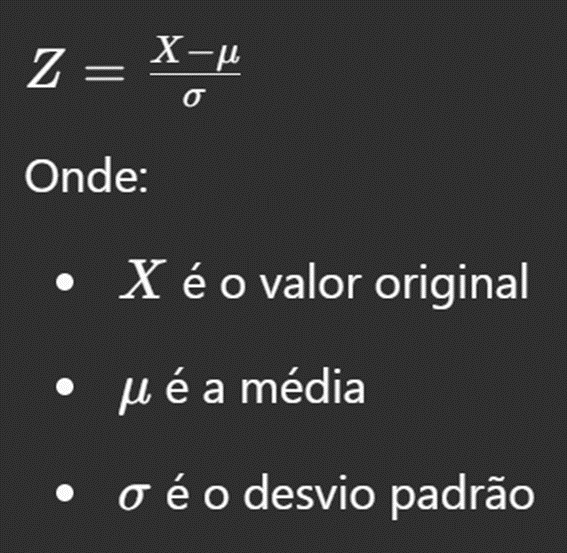

In [ ]:
from scipy.stats import zscore  # Importa a função 'zscore' da biblioteca SciPy, que calcula o escore z (z-score) para os dados.

# Define uma função para detectar outliers usando o método do z-score
def detectar_outliers_zscore(dados, limiar=3):  # A função recebe dois parâmetros:
                                               # - 'dados': uma lista ou array de valores numéricos.
                                               # - 'limiar': um valor limite para identificar outliers (padrão é 3).
    z_scores = np.abs(zscore(dados))  # Calcula o valor absoluto dos z-scores para cada ponto nos dados.
                                     # O z-score mede quantos desvios padrão um ponto está da média.
    return dados[z_scores > limiar]  # Retorna os valores que têm z-score maior que o limiar, considerados outliers.

# Aplica a função para detectar outliers em uma coluna específica do DataFrame
outliers_z = detectar_outliers_zscore(df['Valores'])  # Chama a função passando a coluna 'Valores' do DataFrame 'df'.
                                                     # A função retorna os outliers encontrados.

# Exibe os outliers detectados
print("Outliers pelo Z-score:", outliers_z.tolist())  # Converte os outliers para uma lista e imprime no console.

# A padronização

A padronização transforma os dados para uma distribuição com média 0 e desvio padrão 1:

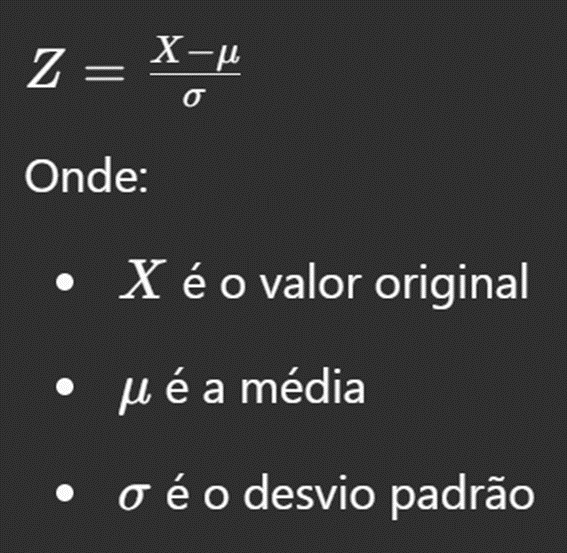

In [ ]:
from scipy.stats import zscore
df['Padronizado'] = zscore(df["Valores"])
plt.hist(df["Padronizado"], bins=20, color="lightcoral", edgecolor="black")
plt.xlabel("Valores Padronizado")
plt.ylabel("Frequencia")
plt.title("Histograma dos valores padronizado")
plt.show()

A normalização transforma os dados para um intervalo [0,1][0,1]:

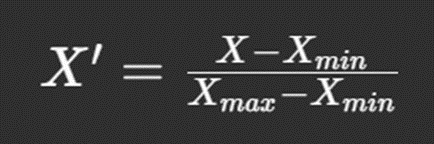

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Normalizado'] = scaler.fit_transform(df[["Valores"]])
plt.hist(df["Normalizado"], bins=20, color="seagreen", edgecolor="black") # Cria um histograma dos dados.
plt.xlabel("Valores")
plt.ylabel("Frequencia")
plt.title("Histograma dos valores normalizado")
plt.show() # Mostra os gráficos.

In [11]:
def normalizar(dados, min_val=0, max_val=1):
    dados_normalizados = (dados - min(dados)) / (max(dados) - min(dados))
    dados_normalizados2 = dados_normalizados * (max_val - min_val) + min_val
    return dados_normalizados2

dados_normalizados = normalizar(df["Valores"])
print(dados_normalizados)

NameError: name 'df' is not defined

### Concluindo

O tratamento de ruídos melhora a qualidade dos dados, garantindo análises mais precisas. Nesta aula, aprendemos a detectar, explorar e tratar ruídos através de padronização e normalização.